# K-Nearest Neighbor (KNN)

* Applicable for both Classification and Regression
    * Lazy learner
        * Instance Based.
        * Lazy because it does not try to learn a function from the training data.
        * It memorise the pattern from the dataset.
    * Nonparametric model
        * distribution-free tests because no assumption of the data needing to follow a specific distribution. 
* Used for :
    * Predict cancer is maligant or benign
    * Pattern recognition
    * Recommender Systems
    * Computer Vision
    * Gene Expression
    * Protein-Protein Interaction and 3D structure Prediction.
* Disadvantages:
    * Not efficient on big data
    * Curse of dimensionality. Very susceptible to overfitting.
    
    
* Steps:
    * Choose the number of k
    * select a distance metric
    * Find the K nearest neighbors of the sample
    * Assign the class label by majority vote

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
    

In [2]:
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
x_train=df[['petal_length','petal_width']]
species_to_num={
    'setosa':0,
    'versicolor':1,
    'virginica':2
}
df['species']=df['species'].map(species_to_num)
y_train=df['species']

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=50)

In [7]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=50)

In [14]:
xv=x_train.values.reshape(-1,1)
xv

array([[1.4],
       [0.2],
       [1.4],
       [0.2],
       [1.3],
       [0.2],
       [1.5],
       [0.2],
       [1.4],
       [0.2],
       [1.7],
       [0.4],
       [1.4],
       [0.3],
       [1.5],
       [0.2],
       [1.4],
       [0.2],
       [1.5],
       [0.1],
       [1.5],
       [0.2],
       [1.6],
       [0.2],
       [1.4],
       [0.1],
       [1.1],
       [0.1],
       [1.2],
       [0.2],
       [1.5],
       [0.4],
       [1.3],
       [0.4],
       [1.4],
       [0.3],
       [1.7],
       [0.3],
       [1.5],
       [0.3],
       [1.7],
       [0.2],
       [1.5],
       [0.4],
       [1. ],
       [0.2],
       [1.7],
       [0.5],
       [1.9],
       [0.2],
       [1.6],
       [0.2],
       [1.6],
       [0.4],
       [1.5],
       [0.2],
       [1.4],
       [0.2],
       [1.6],
       [0.2],
       [1.6],
       [0.2],
       [1.5],
       [0.4],
       [1.5],
       [0.1],
       [1.4],
       [0.2],
       [1.5],
       [0.2],
       [1.2],
      

In [15]:
h=0.02
x_min,x_max=xv.min(),xv.max()+1
x_min,x_max

(0.1, 7.9)

In [13]:
y_train.unique()

array([0, 1, 2], dtype=int64)

In [10]:
y_min,y_max=y_train.min(),y_train.max()+1
y_min,y_max

(0, 3)

In [17]:
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [18]:
xx,yy

(array([[0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88],
        [0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88],
        [0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88],
        ...,
        [0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88],
        [0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88],
        [0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88]]),
 array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
        [0.04, 0.04, 0.04, ..., 0.04, 0.04, 0.04],
        ...,
        [2.94, 2.94, 2.94, ..., 2.94, 2.94, 2.94],
        [2.96, 2.96, 2.96, ..., 2.96, 2.96, 2.96],
        [2.98, 2.98, 2.98, ..., 2.98, 2.98, 2.98]]))

In [19]:
z=knn.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)

In [20]:
z

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]], dtype=int64)

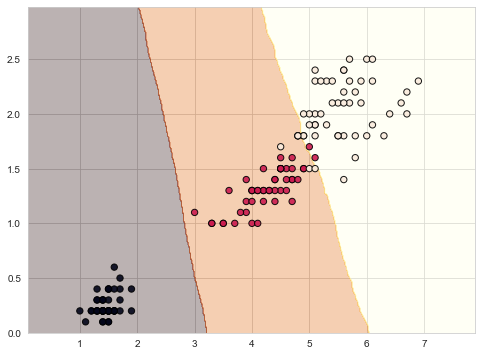

In [21]:
fig=plt.figure(figsize=(8,6))
ax=plt.contourf(xx,yy,z,cmap='afmhot',alpha=0.3);
plt.scatter(x_train.values[:,0],x_train.values[:,1],c=y_train,s=40,alpha=0.9,edgecolors='k')

In [26]:
df1=sns.load_dataset('iris')
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [27]:
x=df.iloc[:,:-1].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [28]:
y=df.iloc[:,4].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [30]:
x_train

array([[6.8, 2.8, 4.8, 1.4],
       [5.7, 2.8, 4.1, 1.3],
       [6.3, 2.5, 5. , 1.9],
       [4.9, 3.6, 1.4, 0.1],
       [6.9, 3.1, 5.1, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.9, 1.7, 0.4],
       [5.8, 2.6, 4. , 1.2],
       [6.3, 3.3, 6. , 2.5],
       [5.9, 3.2, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [5.5, 2.3, 4. , 1.3],
       [4.4, 3. , 1.3, 0.2],
       [5.7, 2.5, 5. , 2. ],
       [4.9, 3.1, 1.5, 0.1],
       [5.3, 3.7, 1.5, 0.2],
       [5.4, 3.7, 1.5, 0.2],
       [5.7, 3.8, 1.7, 0.3],
       [5. , 3.2, 1.2, 0.2],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [5.5, 3.5, 1.3, 0.2],
       [5.9, 3. , 4.2, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [5.6, 2.7, 4.2, 1.3],
       [7.2, 3. , 5.8, 1.6],
       [6.3, 2.8, 5.1, 1.5],
       [6.7, 3. , 5. , 1.7],
       [5.1, 3.3, 1.7, 0.5],
       [7.4, 2.8, 6.1, 1.9],
       [5.5, 2.4, 3.8, 1.1],
       [4.4, 3.2, 1.3, 0.2],
       [6. , 3.4, 4.5, 1.6],
       [5.1, 3.5, 1.4, 0.3],
       [6.4, 2

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [32]:
x_train

array([[ 1.11156224e+00, -5.47570956e-01,  5.21122889e-01,
         1.98551024e-01],
       [-2.34549831e-01, -5.47570956e-01,  1.15805087e-01,
         6.31753258e-02],
       [ 4.99693119e-01, -1.25665565e+00,  6.36927976e-01,
         8.75429515e-01],
       [-1.21354043e+00,  1.34332155e+00, -1.44756358e+00,
        -1.56133305e+00],
       [ 1.23393607e+00,  1.61513735e-01,  6.94830519e-01,
         1.41693231e+00],
       [-1.33591426e+00, -7.48478285e-02, -1.44756358e+00,
        -1.29058166e+00],
       [-6.01671307e-01,  2.05240624e+00, -1.27385595e+00,
        -1.15520596e+00],
       [-1.12176006e-01, -1.02029408e+00,  5.79025433e-02,
        -7.22003723e-02],
       [ 4.99693119e-01,  6.34236862e-01,  1.21595341e+00,
         1.68768370e+00],
       [ 1.01978188e-02,  3.97875299e-01,  5.21122889e-01,
         7.40053817e-01],
       [ 2.54945469e-01, -7.48478285e-02,  5.79025433e-01,
         7.40053817e-01],
       [-4.79297482e-01, -1.72937877e+00,  5.79025433e-02,
      

In [33]:
x_test

array([[-1.45828808,  0.3978753 , -1.50546612, -1.42595735],
       [ 0.74444077, -0.07484783,  1.10014832,  1.28155661],
       [-0.11217601, -0.78393252,  0.11580509, -0.34295177],
       [-1.09116661, -1.72937877, -0.34741526, -0.34295177],
       [-0.96879278,  1.81604468, -1.38966104, -1.29058166],
       [ 0.98918842,  0.16151374,  0.28951272,  0.19855102],
       [ 0.49969312, -1.72937877,  0.28951272,  0.06317533],
       [-0.96879278,  1.81604468, -1.15805087, -1.15520596],
       [-1.09116661, -0.07484783, -1.33175849, -1.42595735],
       [-1.09116661,  0.87059843, -1.33175849, -1.15520596],
       [-0.47929748,  2.76149093, -1.44756358, -1.42595735],
       [-1.33591426,  0.87059843, -1.15805087, -1.42595735],
       [ 0.37731929, -0.54757096,  0.52112289,  0.74005382],
       [-0.96879278,  1.57968312, -1.38966104, -1.15520596],
       [ 0.37731929, -1.96574034,  0.34741526,  0.33392672],
       [-1.45828808,  0.3978753 , -1.33175849, -1.42595735],
       [-0.47929748, -1.

In [34]:
model=KNeighborsClassifier(n_neighbors=5)

In [35]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [37]:
y_pred=model.predict(x_test)
y_pred

array([0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0,
       2, 2, 0, 2, 0, 1, 2, 0], dtype=int64)

In [38]:
model.score(x_test,y_test)

1.0

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[15  0  0]
 [ 0  8  0]
 [ 0  0  7]]
